<a href="https://colab.research.google.com/github/IT22276582/dl-lab-7/blob/main/chest_data_set_train_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

#/content/drive/MyDrive/archive.zip

zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/drive/MyDrive/chest_xray"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped successfully!")


✅ Unzipped successfully!


In [ ]:
train_dir = "/content/drive/MyDrive/chest_xray/chest_xray/train"
val_dir   = "/content/drive/MyDrive/chest_xray/chest_xray/val"
test_dir  = "/content/drive/MyDrive/chest_xray/chest_xray/test"

# Rescale pixels (0–255 → 0–1) + Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')

val_gen = val_datagen.flow_from_directory(val_dir,target_size=(150, 150),batch_size=32,class_mode='binary')


print(train_gen.class_indices)
print(val_gen.class_indices)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}
{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
model = Sequential([
    # Layer 1: Convolution + Pooling
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # helps prevent overfitting
    Dense(1, activation='sigmoid')  # output layer → 1 neuron (0=Normal, 1=Pneumonia)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_gen,
                    epochs=10,
                    validation_data=val_gen)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 344s 2s/step - accuracy: 0.7814 - loss: 0.5204 - val_accuracy: 0.6875 - val_loss: 0.6392
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.8894 - loss: 0.2722 - val_accuracy: 0.8125 - val_loss: 0.5034
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8940 - loss: 0.2443 - val_accuracy: 0.6875 - val_loss: 1.0849
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9075 - loss: 0.2442 - val_accuracy: 0.8125 - val_loss: 0.3626
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9256 - loss: 0.1903 - val_accuracy: 0.6875 - val_loss: 0.8673
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.9321 - loss: 0.1795 - val_accuracy: 0.6875 - val_loss: 0.8942
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 332s 2s/step - accuracy: 0.9444 - loss: 0.1540 - val_accuracy: 0.7500 - val_loss: 0.7268
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9345 - loss: 0.1601 - val_accu

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='binary',
                                            shuffle=False)

loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {acc*100:.2f}%")

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 731ms/step - accuracy: 0.8414 - loss: 0.5326
✅ Test Accuracy: 89.26%


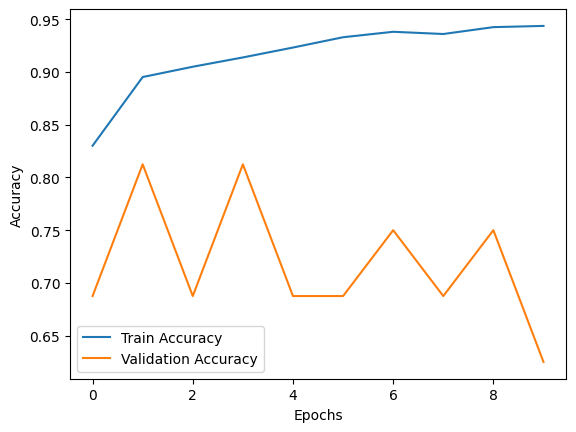

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the full model
model.save("/content/drive/MyDrive/chest_xray_cnn_model.h5")